In [2]:
!cp -r "/content/drive/MyDrive/HandGesture/images" /content/


In [3]:
data_source = "/content/images"

In [4]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt


thumbs: 537 images
rock_on: 531 images
up: 504 images
fingers_crossed: 504 images
peace: 526 images
okay: 540 images
scissor: 527 images
paper: 539 images
rock: 508 images
call_me: 527 images


Total images: 5243


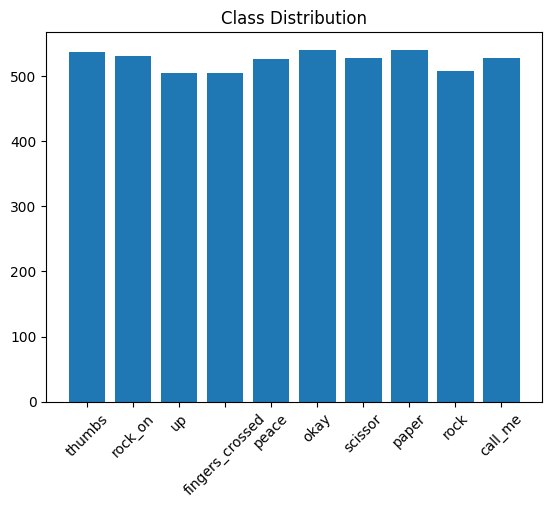

In [5]:
classes = os.listdir(data_source)

count_per_class = {}
for cls in classes:
    count_per_class[cls] = len(os.listdir(os.path.join(data_source, cls)))

for k,v in count_per_class.items():
    print(f"{k}: {v} images")

print("\n\nTotal images:", sum(count_per_class.values()))

# Plot distribution
plt.bar(count_per_class.keys(), count_per_class.values())
plt.xticks(rotation=45)
plt.title("Class Distribution")
plt.show()


In [6]:
import os
import cv2

SRC = "/content/images"

classes = sorted(os.listdir(SRC))

for cls in classes:
    src_cls = os.path.join(SRC, cls)

    corrupted = 0

    for img_name in os.listdir(src_cls):
        img_path = os.path.join(src_cls, img_name)

        try:
            img = cv2.imread(img_path)
            if img is None:
                raise ValueError("cv2.imread returned None")

            if len(img.shape) != 3:
                raise ValueError("Invalid image shape")

        except Exception as e:
            print(f"Corrupted: {img_path}")
            corrupted += 1

    print(f"Total corrupted in {cls}: {corrupted}")


Total corrupted in call_me: 0
Total corrupted in fingers_crossed: 0
Total corrupted in okay: 0
Total corrupted in paper: 0
Total corrupted in peace: 0
Total corrupted in rock: 0
Total corrupted in rock_on: 0
Total corrupted in scissor: 0
Total corrupted in thumbs: 0
Total corrupted in up: 0


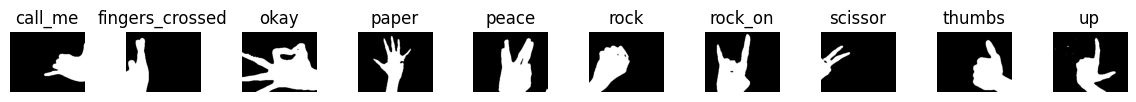

In [10]:
plt.figure(figsize=(12, 4))

for i, cls in enumerate(classes):
    img_name = os.listdir(os.path.join(SRC, cls))[0]
    img = cv2.imread(os.path.join(SRC, cls, img_name))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(1, len(classes), i + 1)
    plt.imshow(img)
    plt.title(cls)
    plt.axis("off")

plt.tight_layout(pad=3)
plt.show()


In [11]:
import os
import shutil
from sklearn.model_selection import train_test_split

SRC = "/content/images"
DEST = "/content/images_split"
TEST_SIZE = 0.2

train_dir = os.path.join(DEST, "train")
test_dir = os.path.join(DEST, "test")
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

classes = sorted(os.listdir(SRC))

for cls in classes:
    src_cls = os.path.join(SRC, cls)
    imgs = os.listdir(src_cls)

    train_imgs, test_imgs = train_test_split(
        imgs, test_size=TEST_SIZE, random_state=42
    )

    # Create class directories in train/test
    os.makedirs(os.path.join(train_dir, cls), exist_ok=True)
    os.makedirs(os.path.join(test_dir, cls), exist_ok=True)

    # Copy images
    for img_name in train_imgs:
        shutil.copy(os.path.join(src_cls, img_name), os.path.join(train_dir, cls, img_name))
    for img_name in test_imgs:
        shutil.copy(os.path.join(src_cls, img_name), os.path.join(test_dir, cls, img_name))

print("Master train/test split done!")


Master train/test split done!


In [ ]:

SRC = "/content/images_split"
DEST = "/content/drive/MyDrive/splitted"

shutil.copytree(SRC, DEST, dirs_exist_ok=True)

